# Kernel SVM

### Importing the libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import the dataset 

In [17]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

### Splitting the dataset into training and test set


In [18]:
from sklearn.cross_validation  import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

### Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/home/Ritik-Gupta/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Fitting classifier to Training set

In [20]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

### Predicting the Test set results

In [21]:
y_pred = classifier.predict(X_test)

### Making the Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)


In [23]:
cm

array([[64,  4],
       [ 3, 29]])

### Visualising the Training set results

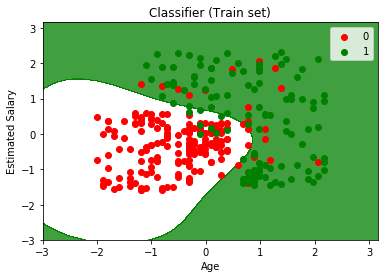

In [24]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_train,y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step = 0.01),
                   np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step = 0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.75,cmap = ListedColormap(('white','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X1.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],
               c = ListedColormap(('red','green'))(i),label = j)
plt.title('Classifier (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the training set results

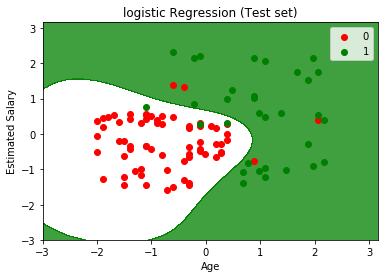

In [25]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_test,y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step = 0.01),
                   np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step = 0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.75,cmap = ListedColormap(('white','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X1.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],
               c = ListedColormap(('red','green'))(i),label = j)
plt.title('logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()